<a href="https://colab.research.google.com/github/arsshielnauval/CRUD-Table/blob/main/Machine%20Learning%20regresi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
import geopandas
import altair as alt
from IPython.display import display
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import seaborn as sns

In [13]:
# Load dataset
df = pd.read_csv('/content/waterQuality1.csv')
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7999 non-null   object 
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7999 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7999 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7999 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver       7999 non-null   float64
 19  uraniu

In [14]:
# Check for missing values
print(df.isnull().sum().to_markdown())
list_null_column = df.columns[df.isnull().any()].tolist()
list_null_column

|             |   0 |
|:------------|----:|
| aluminium   |   0 |
| ammonia     |   0 |
| arsenic     |   0 |
| barium      |   0 |
| cadmium     |   0 |
| chloramine  |   0 |
| chromium    |   0 |
| copper      |   0 |
| flouride    |   0 |
| bacteria    |   0 |
| viruses     |   0 |
| lead        |   0 |
| nitrates    |   0 |
| nitrites    |   0 |
| mercury     |   0 |
| perchlorate |   0 |
| radium      |   0 |
| selenium    |   0 |
| silver      |   0 |
| uranium     |   0 |
| is_safe     |   0 |


[]

In [15]:
# Convert 'ammonia' and 'is_safe' to numeric, replacing invalid values with mode
df.loc[df['ammonia'] == '#NUM!', 'ammonia'] = df['ammonia'].mode()[0]
df['ammonia'] = df['ammonia'].astype(float)
df.loc[df['is_safe'] == '#NUM!', 'is_safe'] = df['is_safe'].mode()[0]
df['is_safe'] = df['is_safe'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7999 non-null   float64
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7999 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7999 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7999 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver       7999 non-null   float64
 19  uraniu

In [16]:
# Encode target variable
le = LabelEncoder()
df['is_safe'] = le.fit_transform(df['is_safe'])

In [17]:
# Split dataset into features and target variable
X = df.drop('is_safe', axis=1)
y = df['is_safe']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Display train-test split proportions
train_proportion = X_train.shape[0] / (X_train.shape[0] + X_test.shape[0])
test_proportion = X_test.shape[0] / (X_train.shape[0] + X_test.shape[0])
print(f'Proporsi data latih (train): {train_proportion:.0%}')
print(f'Proporsi data uji (test): {test_proportion:.0%}')

Proporsi data latih (train): 80%
Proporsi data uji (test): 20%


In [18]:
# Model initialization
lr_model = LogisticRegression()
dt_model = DecisionTreeClassifier()
knn_model = KNeighborsClassifier(n_neighbors=5)
linreg_model = LinearRegression()

# Train models
lr_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)
linreg_model.fit(X_train, y_train)

# Predictions
y_pred_lr = lr_model.predict(X_test)
y_pred_dt = dt_model.predict(X_test)
y_pred_knn = knn_model.predict(X_test)

# For Linear Regression, round predictions to nearest integer to treat as classification
y_pred_linreg = np.round(linreg_model.predict(X_test)).astype(int)

# Accuracy scores
accuracy_lr = accuracy_score(y_test, y_pred_lr)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
accuracy_linreg = accuracy_score(y_test, y_pred_linreg)

# Print accuracy scores
print("Accuracy of Logistic Regression model: {:.2f}%".format(accuracy_lr * 100))
print("Accuracy of Decision Tree model: {:.2f}%".format(accuracy_dt * 100))
print("Accuracy of K-Nearest Neighbors model: {:.2f}%".format(accuracy_knn * 100))
print("Accuracy of Linear Regression model: {:.2f}%".format(accuracy_linreg * 100))

Accuracy of Logistic Regression model: 90.19%
Accuracy of Decision Tree model: 95.56%
Accuracy of K-Nearest Neighbors model: 90.19%
Accuracy of Linear Regression model: 88.88%


In [19]:
# Classification reports
print("Classification Report for Logistic Regression:\n", classification_report(y_test, y_pred_lr))
print("Classification Report for Decision Tree:\n", classification_report(y_test, y_pred_dt))
print("Classification Report for K-Nearest Neighbors:\n", classification_report(y_test, y_pred_knn))
print("Classification Report for Linear Regression:\n", classification_report(y_test, y_pred_linreg))

Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.91      0.98      0.95      1400
           1       0.75      0.33      0.45       200

    accuracy                           0.90      1600
   macro avg       0.83      0.65      0.70      1600
weighted avg       0.89      0.90      0.88      1600

Classification Report for Decision Tree:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97      1400
           1       0.82      0.82      0.82       200

    accuracy                           0.96      1600
   macro avg       0.90      0.90      0.90      1600
weighted avg       0.96      0.96      0.96      1600

Classification Report for K-Nearest Neighbors:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95      1400
           1       0.71      0.36      0.48       200

    accuracy                           0.90 

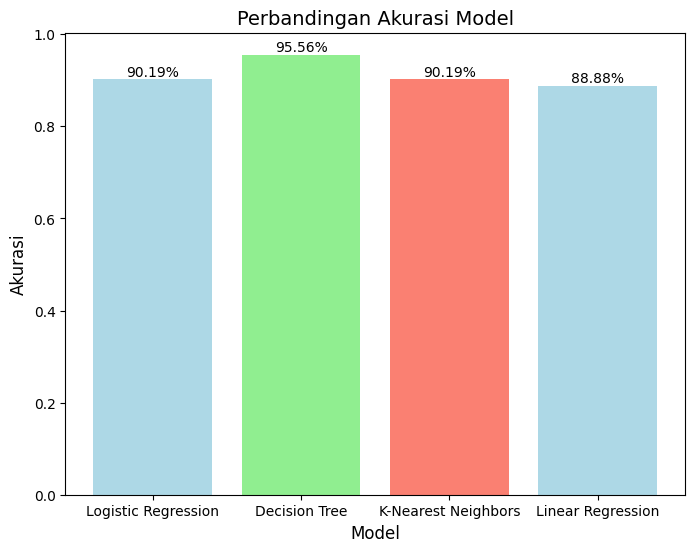

In [21]:
# Visualization
model_names = ['Logistic Regression', 'Decision Tree', 'K-Nearest Neighbors', 'Linear Regression']
accuracies = [accuracy_lr, accuracy_dt, accuracy_knn, accuracy_linreg]
data = pd.DataFrame({'Model': model_names, 'Akurasi': accuracies})

# Altair bar chart
chart = alt.Chart(data).mark_bar().encode(
    x=alt.X('Model:N', axis=alt.Axis(title='Model')),
    y=alt.Y('Akurasi:Q', axis=alt.Axis(title='Akurasi')),
    tooltip=['Model', 'Akurasi']
).properties(
    title='Perbandingan Akurasi Model'
).interactive()

text = chart.mark_text(
    align='center',
    baseline='bottom',
    dy=-5
).encode(
    text=alt.Text('Akurasi:Q', format='.2%')
)

final_chart = chart + text
final_chart

# Matplotlib bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(model_names, accuracies, color=['lightblue', 'lightgreen', 'salmon'])
plt.xlabel('Model', fontsize=12)
plt.ylabel('Akurasi', fontsize=12)
plt.title('Perbandingan Akurasi Model', fontsize=14)

for bar in bars:
    height = bar.get_height()
    label_text = '{:.2f}%'.format(height * 100)
    plt.text(bar.get_x() + bar.get_width() / 2, height, label_text, ha='center', va='bottom')

plt.show()